# 나만의 이미지 시스템 구현

In [38]:
import os, shutil, glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAvgPool2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
root_dir = './datafile/'

if not os.path.exists(os.path.join(root_dir, '27_dog_image/test')):
    os.mkdir(os.path.join(root_dir, '27_dog_image/test'))
if not os.path.exists(os.path.join(root_dir, '27_dog_image/test_image_files')):
    os.mkdir(os.path.join(root_dir, '27_dog_image/test_image_files'))

In [3]:
ratio = 0.1

src_root_dir = os.path.join(root_dir, '27_dog_image/train/')
dst_root_dir = os.path.join(root_dir, '27_dog_image/test/')
label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:
    dst_label_name_dir = dst_root_dir + label_name
    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)

for label_name in label_name_list:
    train_image_file_list = glob.glob(src_root_dir + label_name+'/*')
    split_num = int(ratio*len(train_image_file_list))
    test_image_file_list = train_image_file_list[0:split_num]

    for image_file in test_image_file_list:
        shutil.move(image_file, dst_root_dir+label_name)

In [11]:
src_root_dir = os.path.join(root_dir, '27_dog_image/test/')
dst_root_dir = os.path.join(root_dir, '27_dog_image/test_image_files/')

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:
    image_file_list = glob.glob(src_root_dir+label_name+'/*')
    print('total [%s] image file nums => [%s]' % (label_name, len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:
        shutil.copy(image_file, dst_root_dir)
        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)

total [chihuahua] image file nums => [36]
total copy nums =>  36
total [jindo_dog] image file nums => [36]
total copy nums =>  36
total [shepherd] image file nums => [37]
total copy nums =>  37
total [yorkshire_terrier] image file nums => [37]
total copy nums =>  37


In [40]:
IMG_WIDTH, IMG_HEIGHT = 224, 224

train_dir = os.path.join(root_dir, '27_dog_image/train/')
validation_dir = os.path.join(root_dir, '27_dog_image/train/')
test_dir = os.path.join(root_dir, '27_dog_image/test/')

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   validation_split=0.15)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb', 
                                                    class_mode='sparse', subset='training', 
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))
validation_generator = validation_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb', 
                                                              class_mode='sparse', subset='validation', 
                                                              target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 1136 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [41]:
print(train_generator.class_indices)

{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


In [42]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

In [43]:
model = Sequential([
    base_model, 
    Flatten(), 
    Dense(32, activation='relu'), 
    Dropout(0.25),
    Dense(4, activation='softmax')
])

In [44]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                1605664   
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-trainable params: 21,888
_______________________________________

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_generator, validation_data=validation_generator, epochs=50, 
                 callbacks=[earlystopping])

Epoch 1/50
71/71 [==============================] - 17s 212ms/step - loss: 1.4270 - accuracy: 0.4366 - val_loss: 0.7237 - val_accuracy: 0.7677
Epoch 2/50
71/71 [==============================] - 7s 101ms/step - loss: 0.8334 - accuracy: 0.6699 - val_loss: 0.4422 - val_accuracy: 0.8586
Epoch 3/50
71/71 [==============================] - 7s 101ms/step - loss: 0.5858 - accuracy: 0.7650 - val_loss: 0.2872 - val_accuracy: 0.8939
Epoch 4/50
71/71 [==============================] - 7s 97ms/step - loss: 0.4708 - accuracy: 0.8143 - val_loss: 0.2559 - val_accuracy: 0.9242
Epoch 5/50
71/71 [==============================] - 7s 99ms/step - loss: 0.4145 - accuracy: 0.8530 - val_loss: 0.2193 - val_accuracy: 0.9192
Epoch 6/50
71/71 [==============================] - 7s 102ms/step - loss: 0.3825 - accuracy: 0.8556 - val_loss: 0.2181 - val_accuracy: 0.9242
Epoch 7/50
71/71 [==============================] - 7s 102ms/step - loss: 0.3274 - accuracy: 0.8812 - val_loss: 0.1901 - val_accuracy: 0.9293
Epoch 8

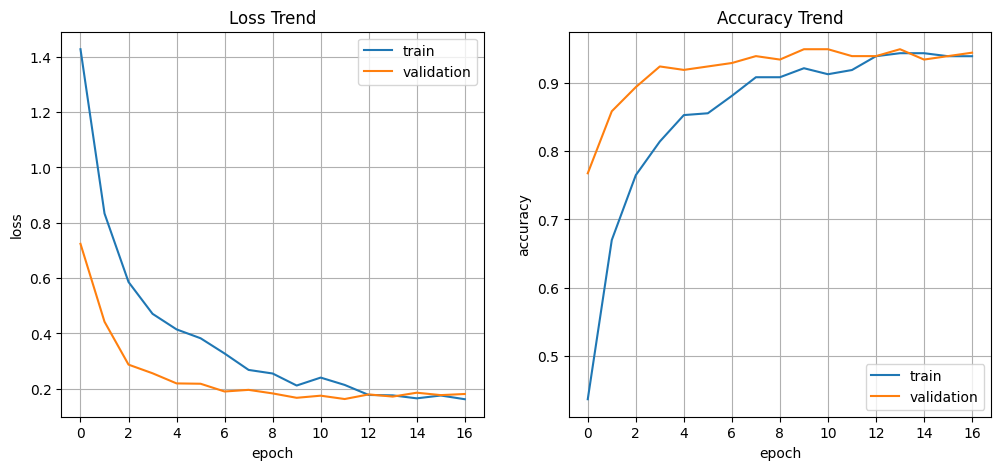

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.show()

In [47]:
import random, os, cv2, glob
import numpy as np

label_dict = {'chihuahua':0, 'jindo_dog':1, 'shepherd':2, 'yorkshire_terrier':3}
test_image_files_list = glob.glob(root_dir+'27_dog_image/test_image_files/*.jpg')

random.shuffle(test_image_files_list)

test_nums = 16
test_image_files = test_image_files_list[:test_nums]

label_list = []
for i in range(len(test_image_files)):
    label = os.path.basename(test_image_files[i]).split('.')[0].strip()
    #label = test_image_files[i].split('/')[-1].split('.')[0].strip()
    label_list.append(label_dict[label])

src_img_list = []
for i in range(len(test_image_files)):
    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    src_img_list.append(src_img)

src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

In [48]:
pred = model.predict(src_img_array)
print(pred.shape)

1/1 [==============================] - 0s 286ms/step
(16, 4)


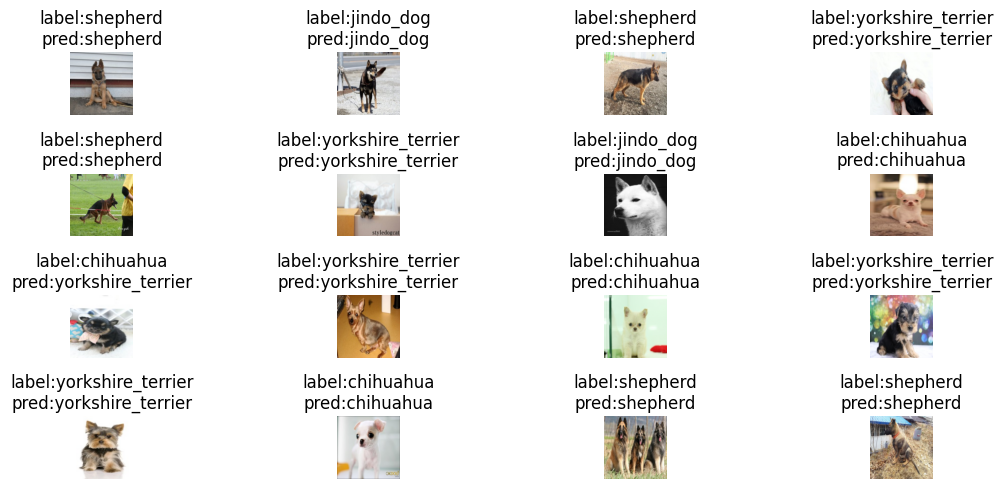

In [51]:
class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
plt.figure(figsize=(12, 5))
for pos in range(len(pred)):
    plt.subplot(4, 4, pos+1)
    plt.axis('off')
    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]
    plt.title('label:'+label_str+'\npred:'+pred_str)
    plt.imshow(src_img_array[pos])
plt.tight_layout()
plt.show()